In [1]:
from cs103 import *



# CPSC 103 - Systematic Program Design
# Module 05 Day 1
Rik Blok, with thanks to Ian Mitchell and Giulia Toti

---

# Make-up Monday

This Thursday, October 12 (in two days):
- Your THURSDAY classes will be canceled.  Instead, your MONDAY classes will take place at their regularly scheduled time and location on Thursday October 12.
- So **this** lecture will be canceled this Thursday.
- Thursday tutorial classes will also be canceled this Thursday.
- Students in Thursday sections (T1G, T1H, T1J, T1K, T1M, and T1P: check [Thursday tutorial replacements for Make-up Monday](https://canvas.ubc.ca/courses/123409/discussion_topics/1979770) Canvas announcement for alternate tutorials offered this week.

---

# Reminders
- **Tonight**: Module 4 (Compound): Worksheet
- this Wed-Fri: Module 5 Tutorial Attendance
- Wed: Module 4 (Compound): Code Review
- Wed: Module 2 (HtDF): Tutorial Resubmission (optional)
- Wed: Module 4 (Compound): Tutorial Submission
- Fri: [Project Team Registration](https://canvas.ubc.ca/courses/123409/assignments/1615250) (only required if you are doing the project with a partner)


See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# Data types

### So far:
- Simple atomic
- Interval
- Enumeration
- Optional
- Compound data

### Now:
- Arbitrary-sized or *lists* (Module 5)

---

# Module learning goals

By the end of this module, you will be able to:

- Understand and use Python’s List type. 
- Identify problem domain information of arbitrary size that should be represented as arbitrary-sized data. 
- Use the HtDD and Data Driven Templates recipes with arbitrary-sized data. 
- Design functions that take in and/or return lists. 

---

# Arbitrary-sized data or `List`

A `List` is for information that is well represented as a group of elements of the same type:
- a list of names, e.g., `["Ian", "Rik", "Taryn"]`
- a list of integers, e.g., `[1, 1, 2, 3, 5, 8, 13]`
- a list of compound data, e.g., `[Velocity(9,22), Velocity(3.4,180), Velocity(7.6,270)]`

### Arbitrary-sized doesn't necessarily mean large

It just means we want flexibility in the number of items we store.

---

# Variables of different types

### Simple atomic, interval, enumeration, optional
- One box, one value
- Different kinds of boxes depending on data being stored (e.g., `str` vs. `bool` vs. `Enumeration` vs. `Optional`)

<div style="width: 100%; display: flex; justify-content: space-between;">
    
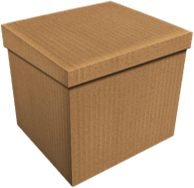 
    
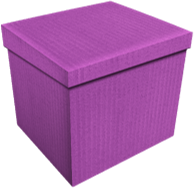 
    
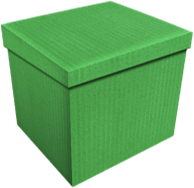 
    
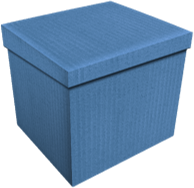
    
</div>

A function can pass back any of these "boxes" as a return type, or any of the boxes below.

### Compound
- One box can contain several other boxes, including different kinds of boxes
- Every instance of a container holds the same number and kinds of boxes inside

<div>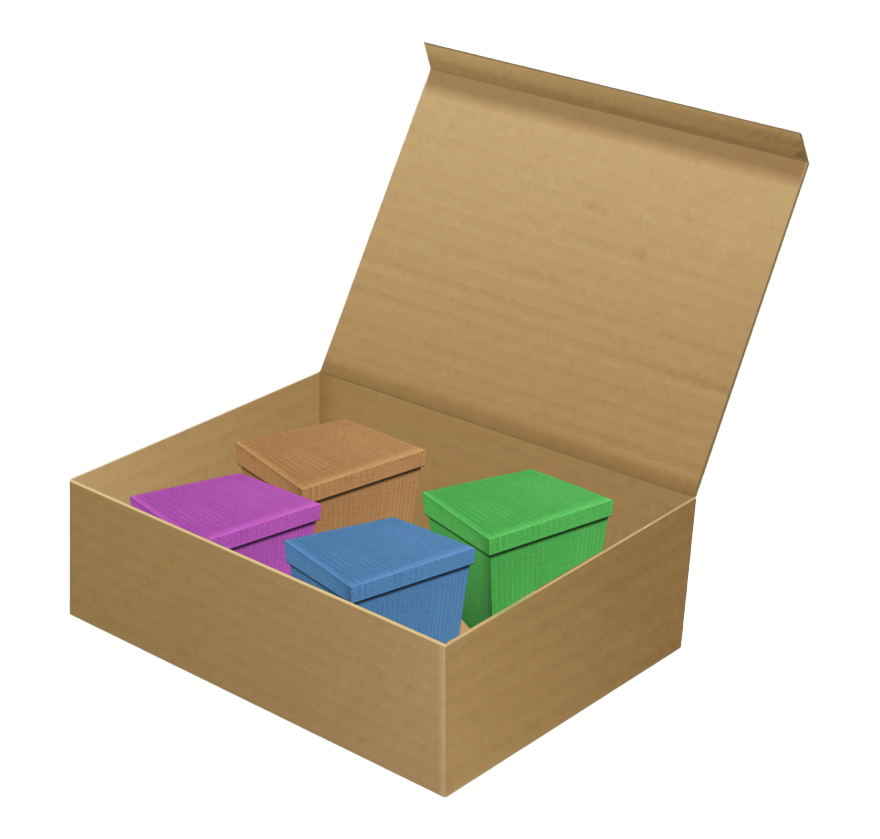</div>

### List
- A container that can stretch to fit a stack of boxes, as long as they're all boxes of the same size and kind

<div>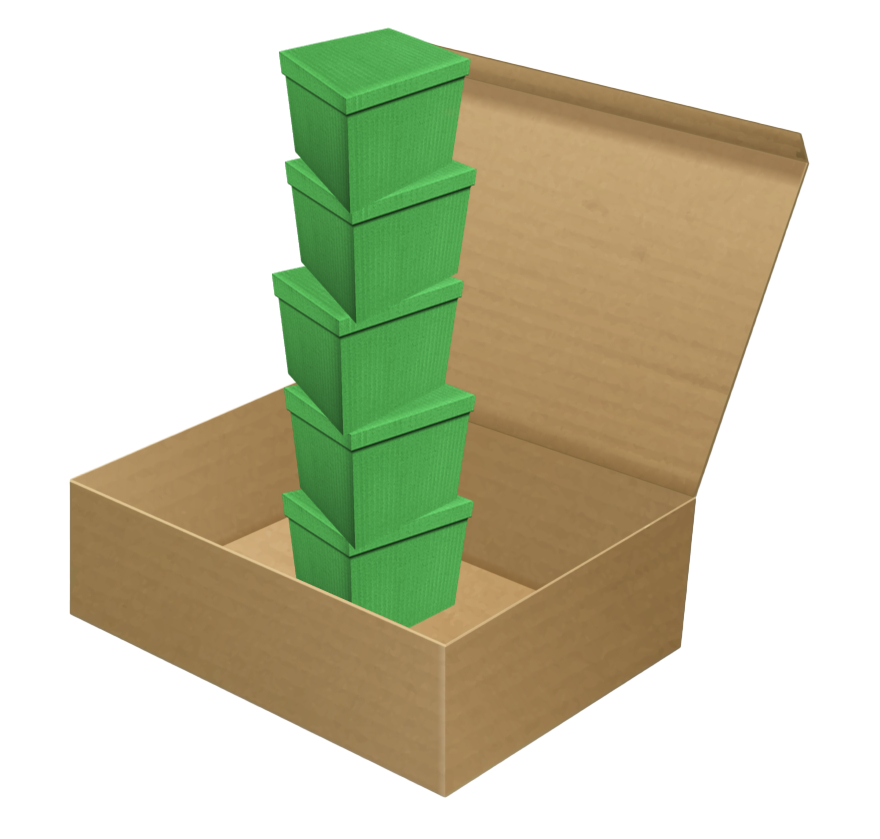</div>

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker questions: Pick the best data type

Consider the problem of representing real estate information.  Pick the best data type for each of the following kinds of information:

1. A property (including building type, square footage, year built, etc.)  <details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>Several different kinds of data in one container.</details>  
    
<details><summary style="cursor:pointer; display:list-item">Next</summary>

2. A realtor's inventory of homes for sale  <details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>A variable number of items of the same kind of data.</details>  
    
<details><summary style="cursor:pointer; display:list-item">Next</summary>

3. The building type (single family detached, townhouse, duplex, apartment, or co-op)  <details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>One of several options.</details>  

<details><summary style="cursor:pointer; display:list-item">Next</summary>

4. An address (street, number, city, province, postal code)  <details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>Several different kinds of data in one container.</details>  

<details><summary style="cursor:pointer; display:list-item">Next</summary>

5. All the suites in a building  <details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>A variable number of items of the same kind of data.</details>  

</details>
</details>
</details>
</details>

   **(A)** Interval, &nbsp; &nbsp; **(B)** Enumeration, &nbsp; &nbsp; **(C)** Optional, &nbsp; &nbsp; **(D)** Compound, &nbsp; &nbsp; **(E)** List

---

<div class="alert alert-danger">
    
# ⛔ Warning: Don't mix data types in a list

A Python list can contain different data types at the same time ("mixing data types").
- Mixing data types in a list is prone to error, so generally speaking it is not recommended.
- Example: 
```python
MyProperty = [BuildingType.APARTMENT, 902.0, "1989"]
```
| Item in list  | Value  |
|:---------------|:-------|
| `MyProperty[0]` | `BuildingType.APARTMENT` |
| `MyProperty[1]` | `902.0` |
| `MyProperty[2]` | `"1989"` |

In CPSC 103:
- We plan to loop over items in a list and act on them, expecting that they will all be the same kind of data.
- For consistency and good practices, we will require that **all items in a list must be of the same type**, even though Python will not enforce that restriction.

</div>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡲 List Of Strings Data Definition
* 🡳 [Example](#Example)
    
</details>

# `List[str]` Data Definition



In [ ]:
from typing import List

# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ["hello", "goodbye", "Beatles"]

@typecheck
# template based on arbitrary-sized
def fn_for_los(los: List[str]) -> ...:
    # description of the accumulator
    acc = ...   # type: ...

    for s in los:
        acc = ...(s, acc)

    return ...(acc)


# Applying the HtDD recipe to lists

### Data definition
- We usually don't give the type a name because it's already self-explanatory
```python
ListOfStrings = List[str]
```
would be redundant.  Instead we just add a comment that our new data type is a 
```python
# List[str]
```

### Interpretation
- Can add more information if you know more about the data being stored.
- But not required to interpret the data type in the list... user can review its interp. statement.

### Examples
- Always consider the possibility that the list could be empty, `[]`.
- Naming convention: abbreviation of `List[DataType]` is `LODT` (for "list of data type")

### Template
- function and parameter naming also from "list of data type":
```python
@typecheck
# template based on arbitrary-sized
def fn_for_los(los: List[str]) -> ...:
```
- we will prepare template with "accumulator" variable, `acc`
- helps us keeps track of something interesting we're looking at in the list:
```python
    # description of the accumulator
    acc = ...   # type: ...
```
- `for` loop iterates through all items in the list, performing the function's task
- update accumulator as we progress:
```python
    for s in los:
        acc = ...(s, acc)
```
- return something that depends on the final data stored in the accumulator

```python
    return ...(acc)
```

---

# Designing a function with accumulators

A `for` loop enables a particular set of statements to be executed repeatedly **for all elements in a list.**
- The set of statements is identified by indentation (we previously used indentation to identify the set of statements in a function, or the set of statements in the answer of an `if/elif/else` statement).

```python
    for var_name in the_list:
        statement_1_in_loop_body()
        statement_2_in_loop_body()
                  ⋮
        statement_k_in_loop_body()

    statement_not_in_loop_body()        
```

- `var_name` refers to the current item of `the_list` being processed.
- `var_name` should be a new variable name that clearly identifies it as an item in the list.  E.g. `dt` for `List[DataType]`.
- When designing functions, your accumulator's description should have the words "in the list so far" in them. That's what accumulators do: keep track of information about what we've seen **in the list so far**!

---

# Example

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

* 🡱 [List Of Strings Data Definition](#List[str]-Data-Definition)
* 🡲 Example
    
</details>

Let's design a function to count how many strings in a list are "UBC".  The stub and some examples have already been completed.  Do we need any more?  What's the next step?

In [ ]:
@typecheck
def count_UBCs(unis: List[str]) -> int:
    """
    return the number of times that "UBC" appears in unis.
    """
    return -1 # stub

start_testing()

# Here are some examples. Do we need any more?
expect(count_UBCs(["UW"]), 0)
expect(count_UBCs(["UBC"]), 1)
expect(count_UBCs(["McGill", "SFU", "UBC", "MIT", "Harvard"]), 1)
expect(count_UBCs(["McGill", "SFU", "MIT", "Harvard"]), 0)
expect(count_UBCs(["UBC", "McGill", "SFU", "UBC", "MIT", "Harvard", "UBC"]), 3)

summary()


# Code tracing

Let's trace the code in [Python Tutor](https://pythontutor.com/visualize.html#code=from%20typing%20import%20List%0Adef%20count_UBCs%28unis%3A%20List%5Bstr%5D%29%20-%3E%20int%3A%0A%20%20%20%20%22%22%22%0A%20%20%20%20return%20the%20number%20of%20times%20that%20%22UBC%22%20appears%20in%20unis.%0A%20%20%20%20%22%22%22%0A%20%20%20%20%23%20return%20-1%20%23%20stub%0A%20%20%20%20%23%20Count%20of%20how%20many%20times%20I%20have%20seen%20%22UBC%22%20in%20the%20list%20so%20far%0A%20%20%20%20count%20%3D%200%20%20%20%23%20type%3A%20int%0A%0A%20%20%20%20for%20u%20in%20unis%3A%0A%20%20%20%20%20%20%20%20if%20u%20%3D%3D%20%22UBC%22%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20count%20%3D%20count%20%2B%201%0A%0A%20%20%20%20return%20count%0A%0A%23%20start_testing%28%29,%20expect%28%29,%20and%20summary%28%29%20not%20available%20in%20PythonTutor%0Aassert%20count_UBCs%28%5B%22UBC%22,%20%22McGill%22,%20%22SFU%22,%20%22UBC%22,%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22MIT%22,%20%22Harvard%22,%20%22UBC%22%5D%29%20%3D%3D%203&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).  (Don't peek until you have finished HtDF for `count_UBCs()` already.)

<details class="alert alert-info" style="cursor:pointer;"><summary style="display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
@typecheck
def count_UBCs(unis: List[str]) -> int:
    """
    return the number of times that "UBC" appears in unis.
    """
    # return -1 # stub
    # Template from List[str]
    # Count of how many times I have seen "UBC" in the list so far
    count = 0   # type: int

    for u in unis:
        if u == "UBC":
            count = count + 1

    return count

start_testing()

# Here are some examples. Do we need any more?
expect(count_UBCs([]), 0)
expect(count_UBCs([""]), 0)
expect(count_UBCs(["UW"]), 0)
expect(count_UBCs(["UBC"]), 1)
expect(count_UBCs(["McGill", "SFU", "UBC", "MIT", "Harvard"]), 1)
expect(count_UBCs(["McGill", "SFU", "MIT", "Harvard"]), 0)
expect(count_UBCs(["UBC", "McGill", "SFU", "UBC", "MIT", "Harvard", "UBC"]), 3)

summary()
```
    
</details>

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# Clicker question: Main loop

Below, we've mostly designed a function to determine if a list of strings contains "UBC".  (You may assume a full set of examples is provided.)  Notice that our accumulator is the Boolean variable `found`.  Just the code implementation and testing remain to be completed.

```python
@typecheck
def contains_UBC(unis: List[str]) -> bool:
    """
    Return True if unis includes "UBC", otherwise return False.
    """
    # return True # stub
    # template from List[str]
    # found is True if "UBC" has been found in the list so far, otherwise False.
    found = False   # type: bool

    # "main loop" goes here!

    return found
```

Which of the following `for` statements will correctly implement the "main loop"?  Select all that apply.   [Set iClicker question type to "Multiple Answer".] 

<div style="width: 100%; display: flex; justify-content: space-between;">

<div style="float: left; width: 50%">

### (A)
```python
for u in unis:
    found = (u == "UBC")
```

</div>

<div style="float: left; width: 50%">

### (B)
```python
for u in unis:
    found = found or (u == "UBC")
```

</div>

</div><div style="width: 100%; display: flex; justify-content: space-between;">

<div style="float: left; width: 50%">

### (C)
```python
for u in unis:
    if u == "UBC":
        found = True
    else:
        found = False
```

</div>

<div style="float: left; width: 50%">

### (D)
```python
for u in unis:
    if u == "UBC":
        found = True
```

</div>
</div>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Once `found` has been set to `True`, should we allow it to switch back to `False`?
    
</details>  

---

# How does `return` work in a loop?

Recall, `return (expression)` evaluates `(expression)`, stops the currently running function (no matter what was going on), and returns from the function with the value it got from `(expression)`.

(Note that we can only use `return` inside a function!)

So, in a loop, it ends the loop right away! 

Sometimes, this is a desirable behavior. For example, let's see how we could use `return` to design a function to determine if the list contains "UBC", without using an accumulator.

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# Clicker question: Early returns

We've mostly designed a function to determine if a list of strings contains "UBC".  (You may assume a full set of examples is provided.)  Just the code implementation and testing remain to be completed.

```python
@typecheck
def contains_UBC(unis: List[str]) -> bool:
    """
    Return True if unis includes "UBC", otherwise return False.
    """
    # return True # stub
    # template from List[str]

    # "main loop" goes here!
```

Which of the following `for` statements will correctly implement the "main loop"?  Select all that apply.  [Set iClicker question type to "Multiple Answer".] 

<div style="width: 100%; display: flex; justify-content: space-between;">

<div style="float: left; width: 50%">

### (A)
```python
    for u in unis:
        if u == "UBC":
            return True
        return False
```

</div>

<div style="float: left; width: 50%">

### (B)
```python
    for u in unis:
        if u == "UBC":
            return True
    return False
```

</div>

</div><div style="width: 100%; display: flex; justify-content: space-between;">

<div style="float: left; width: 50%">

### (C)
```python
    for u in unis:
        if u == "UBC":
            return True
            return False
```

</div>

<div style="float: left; width: 50%">

### (D)
```python
    for u in unis:
        if u == "UBC":
            return True
        else:
            return False
```

</div>
</div>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
What does the indentation tell you about when the `return False` statement is executed?
    
</details>  

---

# Accumulator vs. early return

As we've seen, for some tasks we can write code that implements an "early return" to process a list (e.g., "stop as soon as I find what I'm searching for").  Then we don't need to use an accumulator.

But you are always welcome to design your function to use an accumulator, as per the template.  You may see some examples of "early returns" in code you see, but you're not required to use them in your code.

---

# Exercise

If we've already designed `count_UBCs`, can we use that function to implement `contains_UBC`?  As an exercise, redesign the function body of `contains_UBC` to call `count_UBCs`.  Some examples are provided.

In [ ]:
# TODO: Redesign the body of contains_UBC to call count_UBCs



start_testing()

expect(contains_UBC([]), False)
expect(contains_UBC([""]), False)
expect(contains_UBC(["UW"]), False)
expect(contains_UBC(["UBC"]), True)
expect(contains_UBC(["McGill", "SFU", "UBC", "MIT", "Harvard"]), True)
expect(contains_UBC(["McGill", "SFU", "MIT", "Harvard"]), False)
expect(contains_UBC(["UBC", "McGill", "SFU", "UBC", "MIT", "Harvard", "UBC"]), True)

summary()



<details class="alert alert-info" style="cursor:pointer;"><summary style="display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
@typecheck
def contains_UBC(unis: List[str]) -> bool:
    """
    Return True if unis includes "UBC", otherwise return False.
    """
    # return True # stub
    
    return count_UBCs(unis) > 0

start_testing()

expect(contains_UBC([]), False)
expect(contains_UBC([""]), False)
expect(contains_UBC(["UW"]), False)
expect(contains_UBC(["UBC"]), True)
expect(contains_UBC(["McGill", "SFU", "UBC", "MIT", "Harvard"]), True)
expect(contains_UBC(["McGill", "SFU", "MIT", "Harvard"]), False)
expect(contains_UBC(["UBC", "McGill", "SFU", "UBC", "MIT", "Harvard", "UBC"]), True)

summary()
```

</details>

---

# Refactoring

In programming, redesigning the implementation of a function or other collection of code **without** changing its external behaviour is called *refactoring*.  In the case of functions, the external behaviour is defined by the signature and purpose, so if we change the body without changing the signature and purpose then we are refactoring.  In the exercise above, we refactored `contains_UBC()`.

Refactoring is often necessary in any program which sees long-term use; for example, refactoring can be done to reduce the execution time or memory that a program requires (*optimization* of the code), or to set things up so that it is easier to add new features to the program in the future.

But refactoring is also one of the most common ways in which bugs sneak into a program; consequently, it is a time when your previously written tests demonstrate their continuing value: You can run them on the refactored code (called *regression* testing) to see if you accidentally broke anything.  Regression testing is used in other circumstances, but is critical to quickly building confidence in refactored code.   

---

# Designing a data definition for a list of integers

**Problem:** design a data definition for a list of integers.

Once we've learned how to design other data definitions and realize that a data definition for a particular problem needs to be a list, these tend to be fairly straightforward to complete. Let's practice one quickly this week.

Next week, we'll see how things change (for lists, optionals, and compounds!) when a data definition we create refers to another data definition we created!

<div class="alert alert-success">
    
## ✅ Exam reference sheet

We recommend you print out the [Exam reference sheet](https://canvas.ubc.ca/courses/123409/files/27906280?module_item_id=5918654) and use it as you're solving problems.  The same sheet will be provided with your exams.
    
</div>

In [ ]:
# TODO: Design a data definition for a list of integers



<details class="alert alert-info" style="cursor:pointer;"><summary style="display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
from typing import List

# List[int]
# interp. a list of integers
LOI_EMPTY = []
LOI0 = [0]
LOI1 = [-10, 0, 100]

@typecheck
# template based on arbitrary-sized
def fn_for_loi(loi: List[int]) -> ...:
    # description of the accumulator
    acc = ...   # type: ...

    for i in loi:
        acc = ...(i, acc)

    return ...(acc)
```
    
</details>

---